# BIOS 512 Final Project, Fall 2023
## by Lara Brewer

For this project I will be analyzing the U.S. House election results data from TidyTuesday.
This dataset was posted to the TidyTuesday GitHub on November 7, 2023 and includes data from the 1973-2022 U.S. House elections, compiled by the MIT Election Data and Science Lab.

### First, load libraries and data

In [1]:
library('tidyverse')
library ('ggplot2')
library ('scales')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
#suggested load code from the TidyTuesday GitHub

install.packages("tidytuesdayR")

tuesdata <- tidytuesdayR::tt_load('2023-11-07')

Warning message:
“package ‘tidytuesdayR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
--- Compiling #TidyTuesday Information for 2023-11-07 ----

--- There is 1 file available ---

--- Starting Download ---



--- Download complete ---



In [3]:
house <- tuesdata$house

In [4]:
house |> head()

year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>
1976,ALABAMA,AL,1,63,41,US HOUSE,001,GEN,FALSE,FALSE,BILL DAVENPORT,DEMOCRAT,FALSE,TOTAL,58906,157170,FALSE,20230706,FALSE
1976,ALABAMA,AL,1,63,41,US HOUSE,001,GEN,FALSE,FALSE,JACK EDWARDS,REPUBLICAN,FALSE,TOTAL,98257,157170,FALSE,20230706,FALSE
1976,ALABAMA,AL,1,63,41,US HOUSE,001,GEN,FALSE,FALSE,WRITEIN,NA,TRUE,TOTAL,7,157170,FALSE,20230706,FALSE
1976,ALABAMA,AL,1,63,41,US HOUSE,002,GEN,FALSE,FALSE,J CAROLE KEAHEY,DEMOCRAT,FALSE,TOTAL,66288,156362,FALSE,20230706,FALSE
1976,ALABAMA,AL,1,63,41,US HOUSE,002,GEN,FALSE,FALSE,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,FALSE,TOTAL,90069,156362,FALSE,20230706,FALSE
1976,ALABAMA,AL,1,63,41,US HOUSE,002,GEN,FALSE,FALSE,WRITEIN,NA,TRUE,TOTAL,5,156362,FALSE,20230706,FALSE


# **VISUALIZATION 1**

For this visualization I wanted to use `geom_line` to chart percentages of votes for Democrats, Republicans, and Third Party candidates across all states for each election to visualize how party support has changed over time. I then wanted to add in some historical events that overlapped with interesting trends in election results. I created the party groupings and pivoted the tables so that I could create my fine line chart (used `summarize`, `mutate`, `group_by`, `pivot_longer` and `pivot_wider`)

In [39]:
#Created 3 party categories

house1 = house |> 
  group_by(state, state_po, year, party) |> 
  mutate(party = if_else(party %in% c("DEMOCRATIC-NPL", "DEMOCRATIC-FARMER-LABOR", "DEMOCRAT"), "DEMOCRAT", party),
         party = if_else(party %in% c("DEMOCRAT", "REPUBLICAN"), party, "THIRD_PARTY"))


Next, summarize the number of `candidatevotes` and `totalvotes`.

In [40]:
house2 <- house1 |> 
    summarize(candidatevotes = sum(candidatevotes), totalvotes = sum(totalvotes))
house2 %>% head()

`summarise()` has grouped output by 'state', 'state_po', 'year'. You can
override using the `.groups` argument.


state,state_po,year,party,candidatevotes,totalvotes
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
ALABAMA,AL,1976,DEMOCRAT,667052,984181
ALABAMA,AL,1976,REPUBLICAN,314970,652072
ALABAMA,AL,1976,THIRD_PARTY,2159,1092229
ALABAMA,AL,1978,DEMOCRAT,439564,642279
ALABAMA,AL,1978,REPUBLICAN,197176,408765
ALABAMA,AL,1978,THIRD_PARTY,5539,387618


In [44]:
houseviz1 = house2 |> 
  select(state, state_po, year, party, candidatevotes) |>
  pivot_wider(names_from = party, values_from = candidatevotes) |> 
  mutate_all(~ replace(., is.na(.), 0)) |> 
  mutate(total_votes = DEMOCRAT + REPUBLICAN + THIRD_PARTY,
         Democrat = DEMOCRAT/total_votes,
         Republican = REPUBLICAN/total_votes,
         "Third Party" = THIRD_PARTY/total_votes)

houseviz1 %>% head()

`mutate_all()` ignored the following grouping variables:
• Columns `state`, `state_po`, `year`
ℹ Use `mutate_at(df, vars(-group_cols()), myoperation)` to silence the message.


state,state_po,year,DEMOCRAT,REPUBLICAN,THIRD_PARTY,total_votes,Democrat,Republican,Third Party
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALABAMA,AL,1976,667052,314970,2159,984181,0.6777737,0.3200326,0.0021937022
ALABAMA,AL,1978,439564,197176,5539,642279,0.6843817,0.3069943,0.0086239781
ALABAMA,AL,1980,628133,354224,31269,1013626,0.6196891,0.3494622,0.0308486562
ALABAMA,AL,1982,676584,272510,11925,961019,0.7040277,0.2835636,0.0124087037
ALABAMA,AL,1984,821773,308182,18619,1148574,0.7154724,0.2683171,0.0162105358
ALABAMA,AL,1986,678716,436357,444,1115517,0.6084318,0.3911702,0.0003980217


In [45]:
houseviz1_0 <- houseviz1 |> 
  pivot_longer(cols = c('Democrat', "Republican", "Third Party"),
               names_to = "party",
               values_to = "vote") |> 
  mutate(state = str_to_title(tolower(state)),
         state = if_else(state == "District Of Columbia", "DC", state), #This was giving me trouble so I changed the name
         vote = as.numeric(vote),
         party = factor(party, levels = c("Third Party", "Republican", "Democrat")))

In [46]:
#Created average across states

houseviz1_summary = houseviz1_0 %>%
  group_by(year, party) %>%
  summarize(mean_vote = mean(vote)) %>%
  ungroup()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


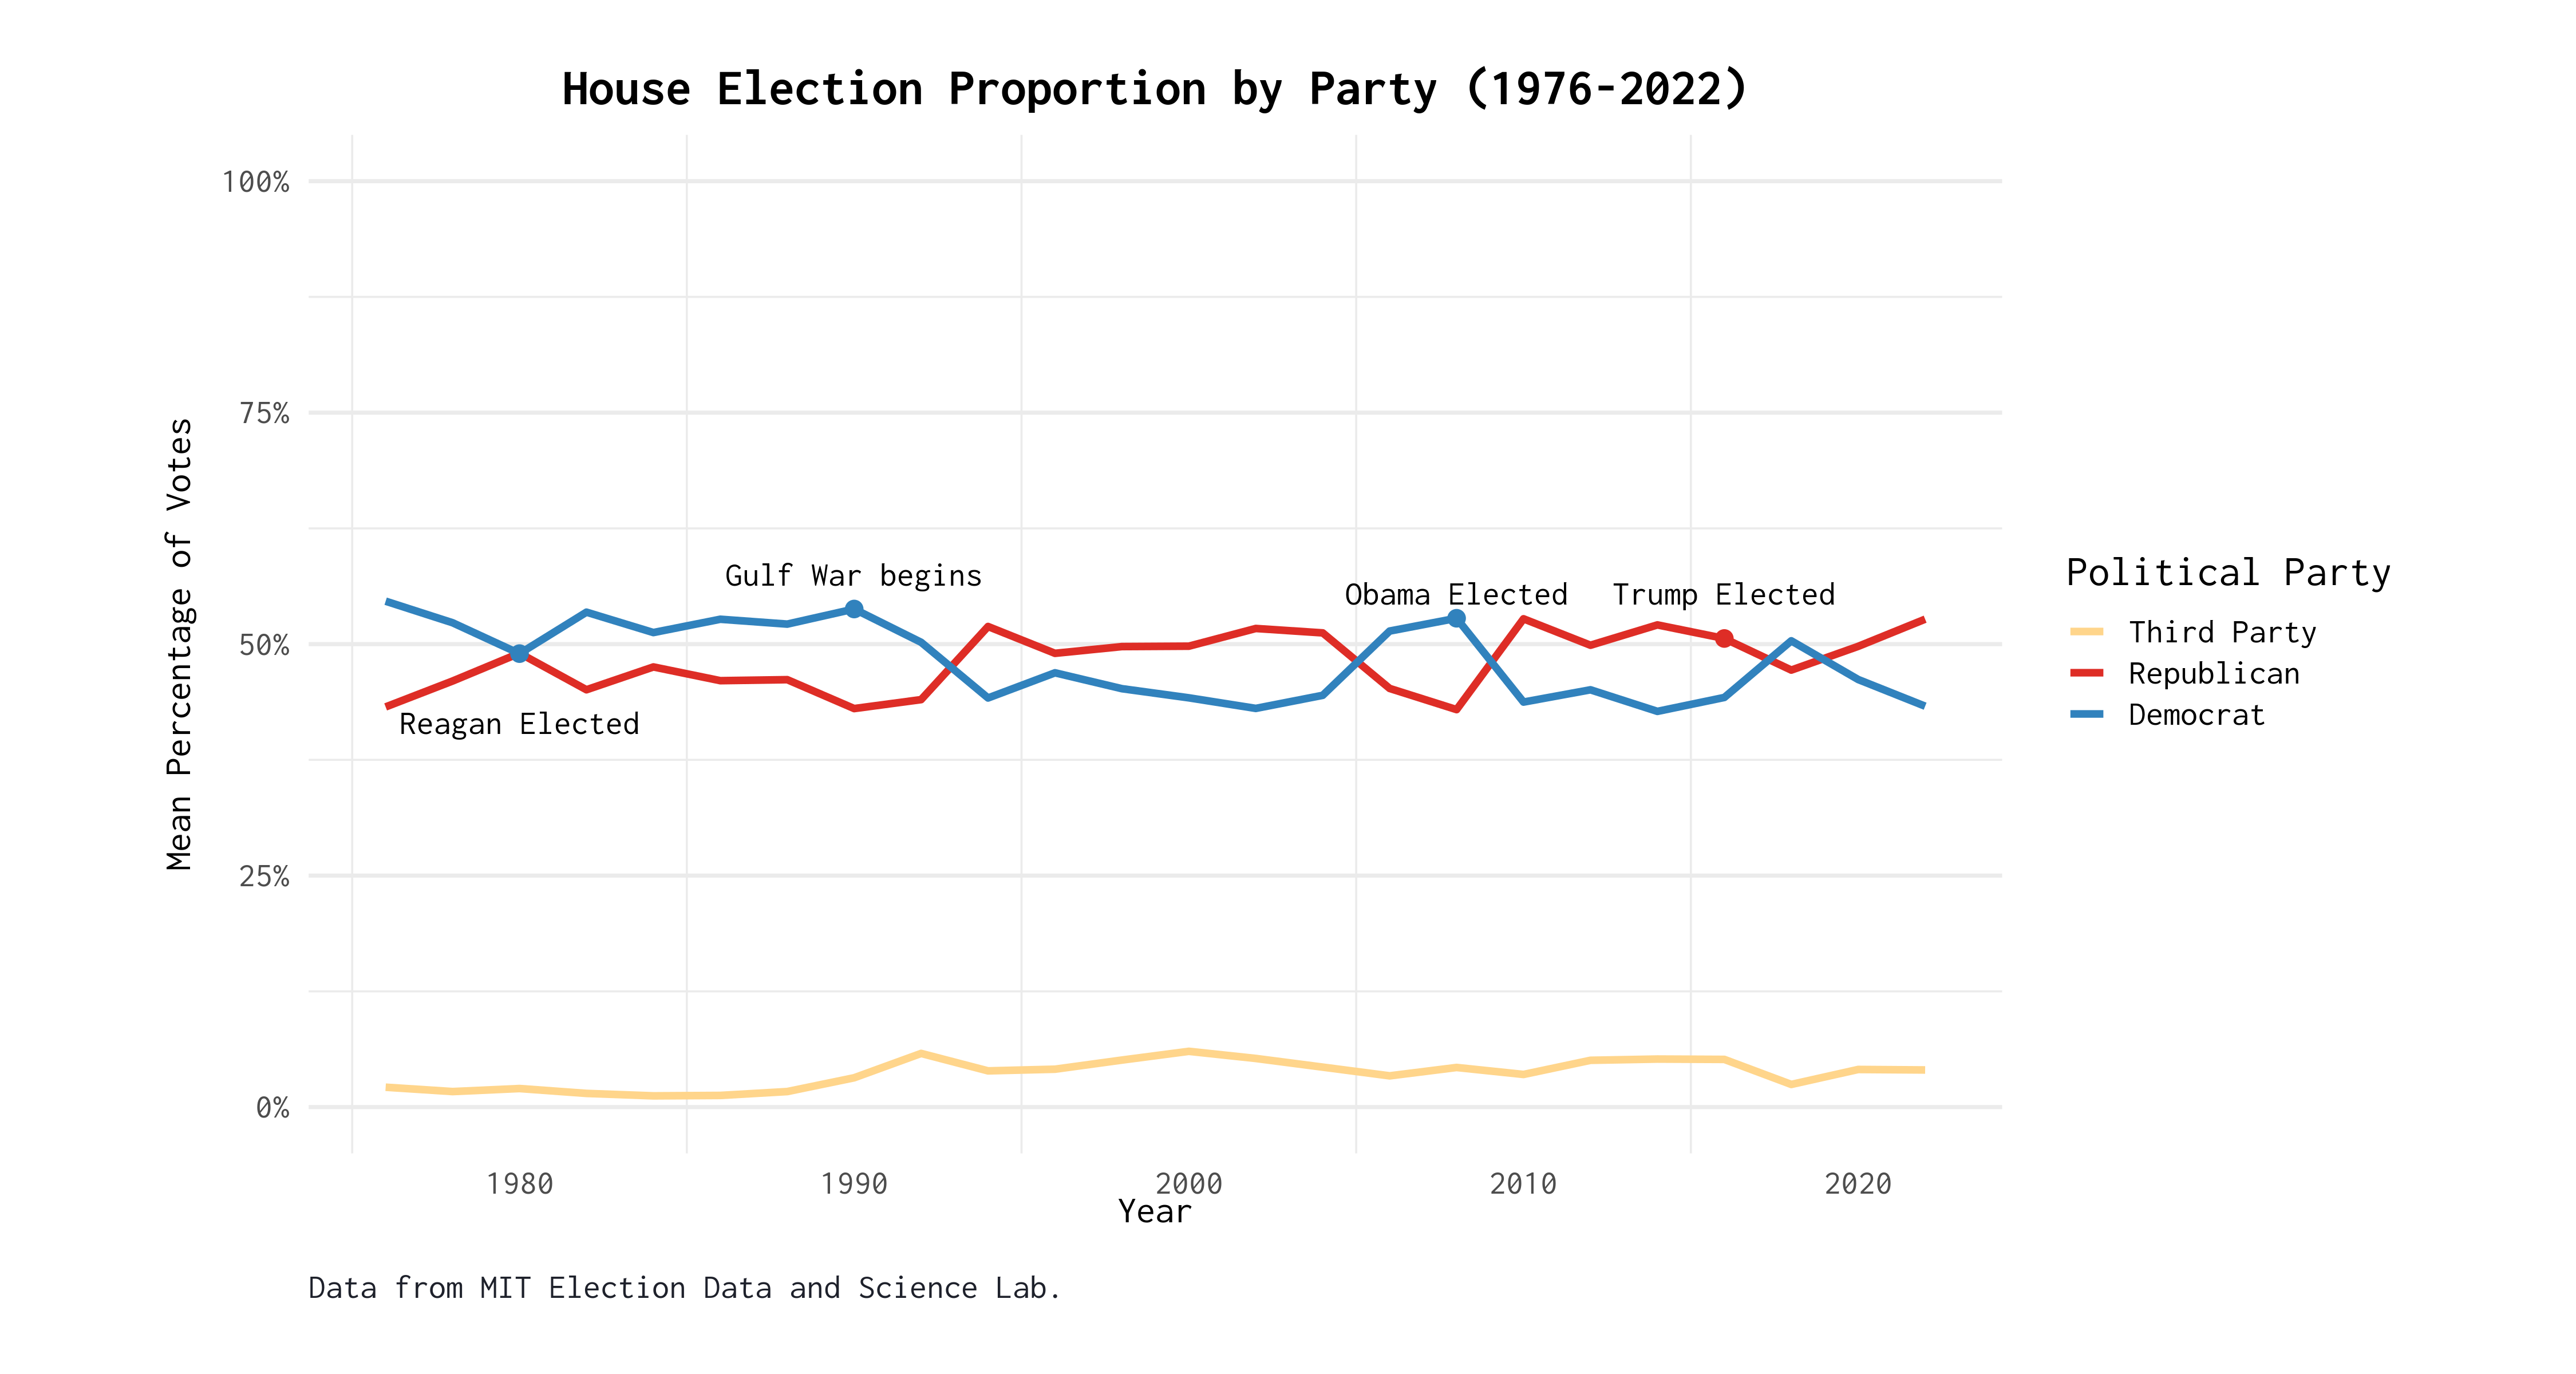

In [47]:
options(repr.plot.width = 15, repr.plot.height = 8)
theme_set(theme_minimal(base_size = 18, base_family = "Georgia"))

party_colors = c("Democrat" = "#3182bd" ,  
                   "Republican" = "#de2d26", 
                   "Third Party" = "#ffd58b" )

p = ggplot(houseviz1_summary, aes(x = year, y = mean_vote * 100, group = party, color = party)) +
    geom_line(linewidth = 1.5) +
    geom_point(data = filter(houseviz1_summary, year == 2008, party == "Democrat"), aes(x = year, y = mean_vote * 100), size = 3, color = "#3182bd") +
    geom_point(data = filter(houseviz1_summary, year == 1980, party == "Democrat"), aes(x = year, y = mean_vote * 100), size = 3, color = "#3182bd") +
    geom_point(data = filter(houseviz1_summary, year == 1990, party == "Democrat"), aes(x = year, y = mean_vote * 100), size = 3, color = "#3182bd") +
    geom_point(data = filter(houseviz1_summary, year == 2016, party == "Republican"), aes(x = year, y = mean_vote * 100), size = 3, color = "#de2d26") +
    scale_color_manual(values = party_colors) +
    scale_y_continuous(labels = scales::percent_format(scale = 1), limits = c(0, 100)) +
    labs(title = "House Election Proportion by Party (1976-2022)",
        caption = "Data from MIT Election Data and Science Lab.",
       x = "Year",
       y = "Mean Percentage of Votes",
        color = "Political Party") +
    theme(panel.grid.major.x = element_blank(),
        axis.title.y = element_text(size = 16, margin = margin(r = 10), family = "Georgia"),
        axis.title.x = element_text(size = 16, margin = margin(r = 10), family = "Georgia"),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.margin = margin(b = 30, t = 30, r = 70, l = 70),
        plot.caption = element_text(colour = "#1E212B", hjust = 0, family = "Georgia", margin = margin(t = 20))) +
    annotate(geom = "text", x = 2008, y = 52, label = "Obama Elected", size = 5, color = "black", vjust = -1,
            family = "Georgia") +
    annotate(geom = "text", x = 1980, y = 38, label = "Reagan Elected", size = 5, color = "black", vjust = -1,
            family = "Georgia") +
    annotate (geom = "text", x = 1990, y = 54, label = "Gulf War begins", size = 5, color = "black", vjust = -1,
            family = "Georgia") +
    annotate (geom = "text", x = 2016, y = 52, label = "Trump Elected", size = 5, color = "black", vjust = -1,
            family = "Georgia")
p

# **VISUALIZATION 2**

For this visualization I wanted to use `geom_tile` to chart how state House votes changed over the time of the data set (1978-2022). I didn't have to manipulate the code much from before, I just had to remove D.C. (only contained 1 year of data), and change all the state names to lowercase before plotting.

In [48]:
houseviz2_1 = houseviz1 %>%
    filter(state != "DC")

In [49]:
houseviz2_2 = houseviz2_1 |>
    mutate(state = str_to_title(tolower(state)))


In [50]:
houseviz2_2 %>% head()

state,state_po,year,DEMOCRAT,REPUBLICAN,THIRD_PARTY,total_votes,Democrat,Republican,Third Party
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,AL,1976,667052,314970,2159,984181,0.6777737,0.3200326,0.0021937022
Alabama,AL,1978,439564,197176,5539,642279,0.6843817,0.3069943,0.0086239781
Alabama,AL,1980,628133,354224,31269,1013626,0.6196891,0.3494622,0.0308486562
Alabama,AL,1982,676584,272510,11925,961019,0.7040277,0.2835636,0.0124087037
Alabama,AL,1984,821773,308182,18619,1148574,0.7154724,0.2683171,0.0162105358
Alabama,AL,1986,678716,436357,444,1115517,0.6084318,0.3911702,0.0003980217


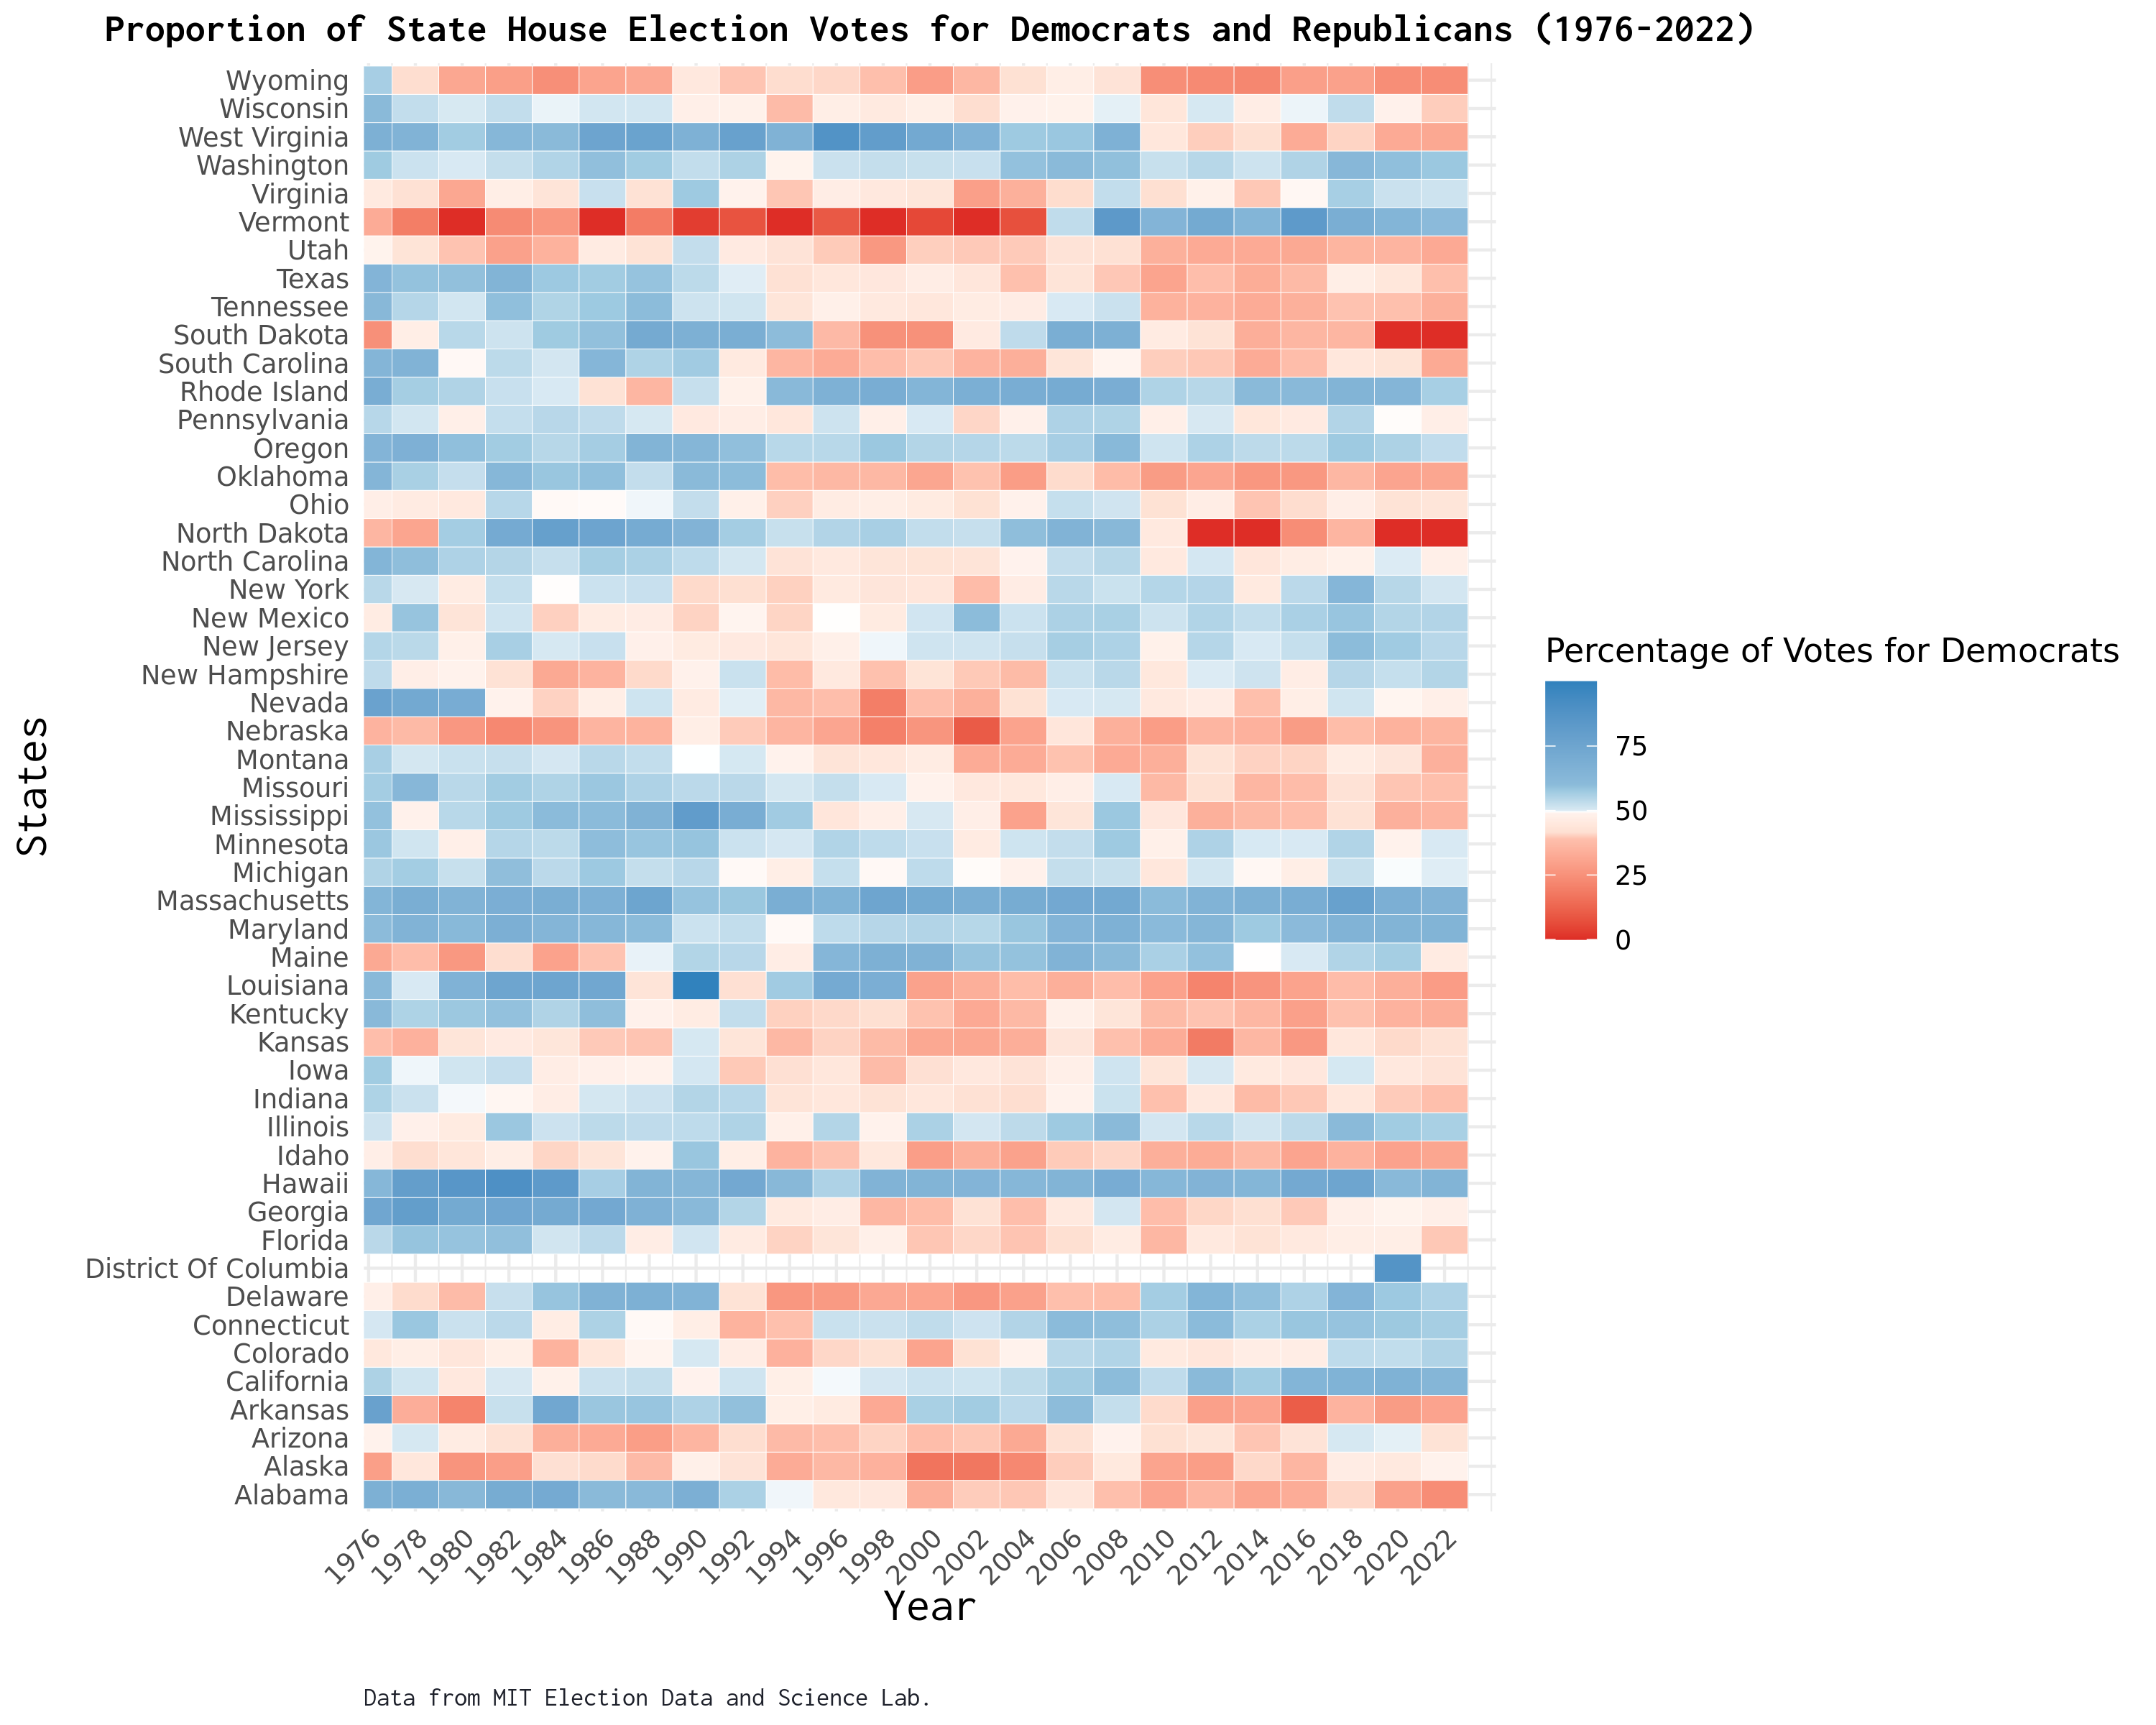

In [62]:
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res = 300)
theme_set(theme_minimal(base_size = 18, base_family = "Georgia"))

p = ggplot(houseviz2_2, aes(x = year, y = state, fill = Democrat * 100)) +
  geom_tile(color = 'white') +
  scale_fill_gradientn(
    colors = c("#de2d26", "#fee0d2", "white", "#9ecae1", "#3182bd"),
    values = scales::rescale(c(0, 39, 49, 50, 60, 100))
  )

#adding in year markings for every x-axis value, default is every 10 years only
p = p + scale_x_continuous(breaks = unique(houseviz2_1$year))+
theme_minimal()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(size = 16, margin = margin(r = 10), family = "Georgia"),
        axis.title.x = element_text(size = 16, margin = margin(r = 10), family = "Georgia"),
        plot.title = element_text(hjust = 0.5, family = "Georgia", face = "bold"),
        plot.caption = element_text(colour = "#1E212B", hjust = 0, family = "Georgia", margin = margin(t = 20))) +
coord_cartesian(xlim = c(1978, 2022)) +
labs(title = "Proportion of State House Election Votes for Democrats and Republicans (1976-2022)",
        caption = "Data from MIT Election Data and Science Lab.",
        x = "Year",
        y = "States",
        fill = "Percentage of Votes for Democrats")

p

# **VISUALIZATION 3**

For the last visualization, I saw a chart online that showed a series of mini bar charts to represent the states. I also wanted to play around with different themes. I used `geom_col` and `coord_flip` and `facet_wrap` to plot bar charts for state. I chose to use the 2018 House elections because I wanted to see if the visuals would look like the "Blue Wave" as it was called. I could build off my old code, but I had to restrict to 2018 data only so I was only plotting that one House election year.

In [52]:
houseviz3 = houseviz1_0 |>
filter(year == "2018")

In [53]:
line_color <- c("#E81B23", "#00AEF3")
font_family <- "sans"
font_color <- "gray35"
bcolor <- "#F8F8F8"

options(repr.plot.width = 15, repr.plot.height = 10)

theme_set(theme_minimal(base_size = 12, base_family = font_family))
  
Title <- "2018 US House Election Results"
Subtitle <- "Vote breakdown between Democrats, Republicans, and Third Party Candidates."
Caption <- "Data from MIT Election Data and Science Lab."


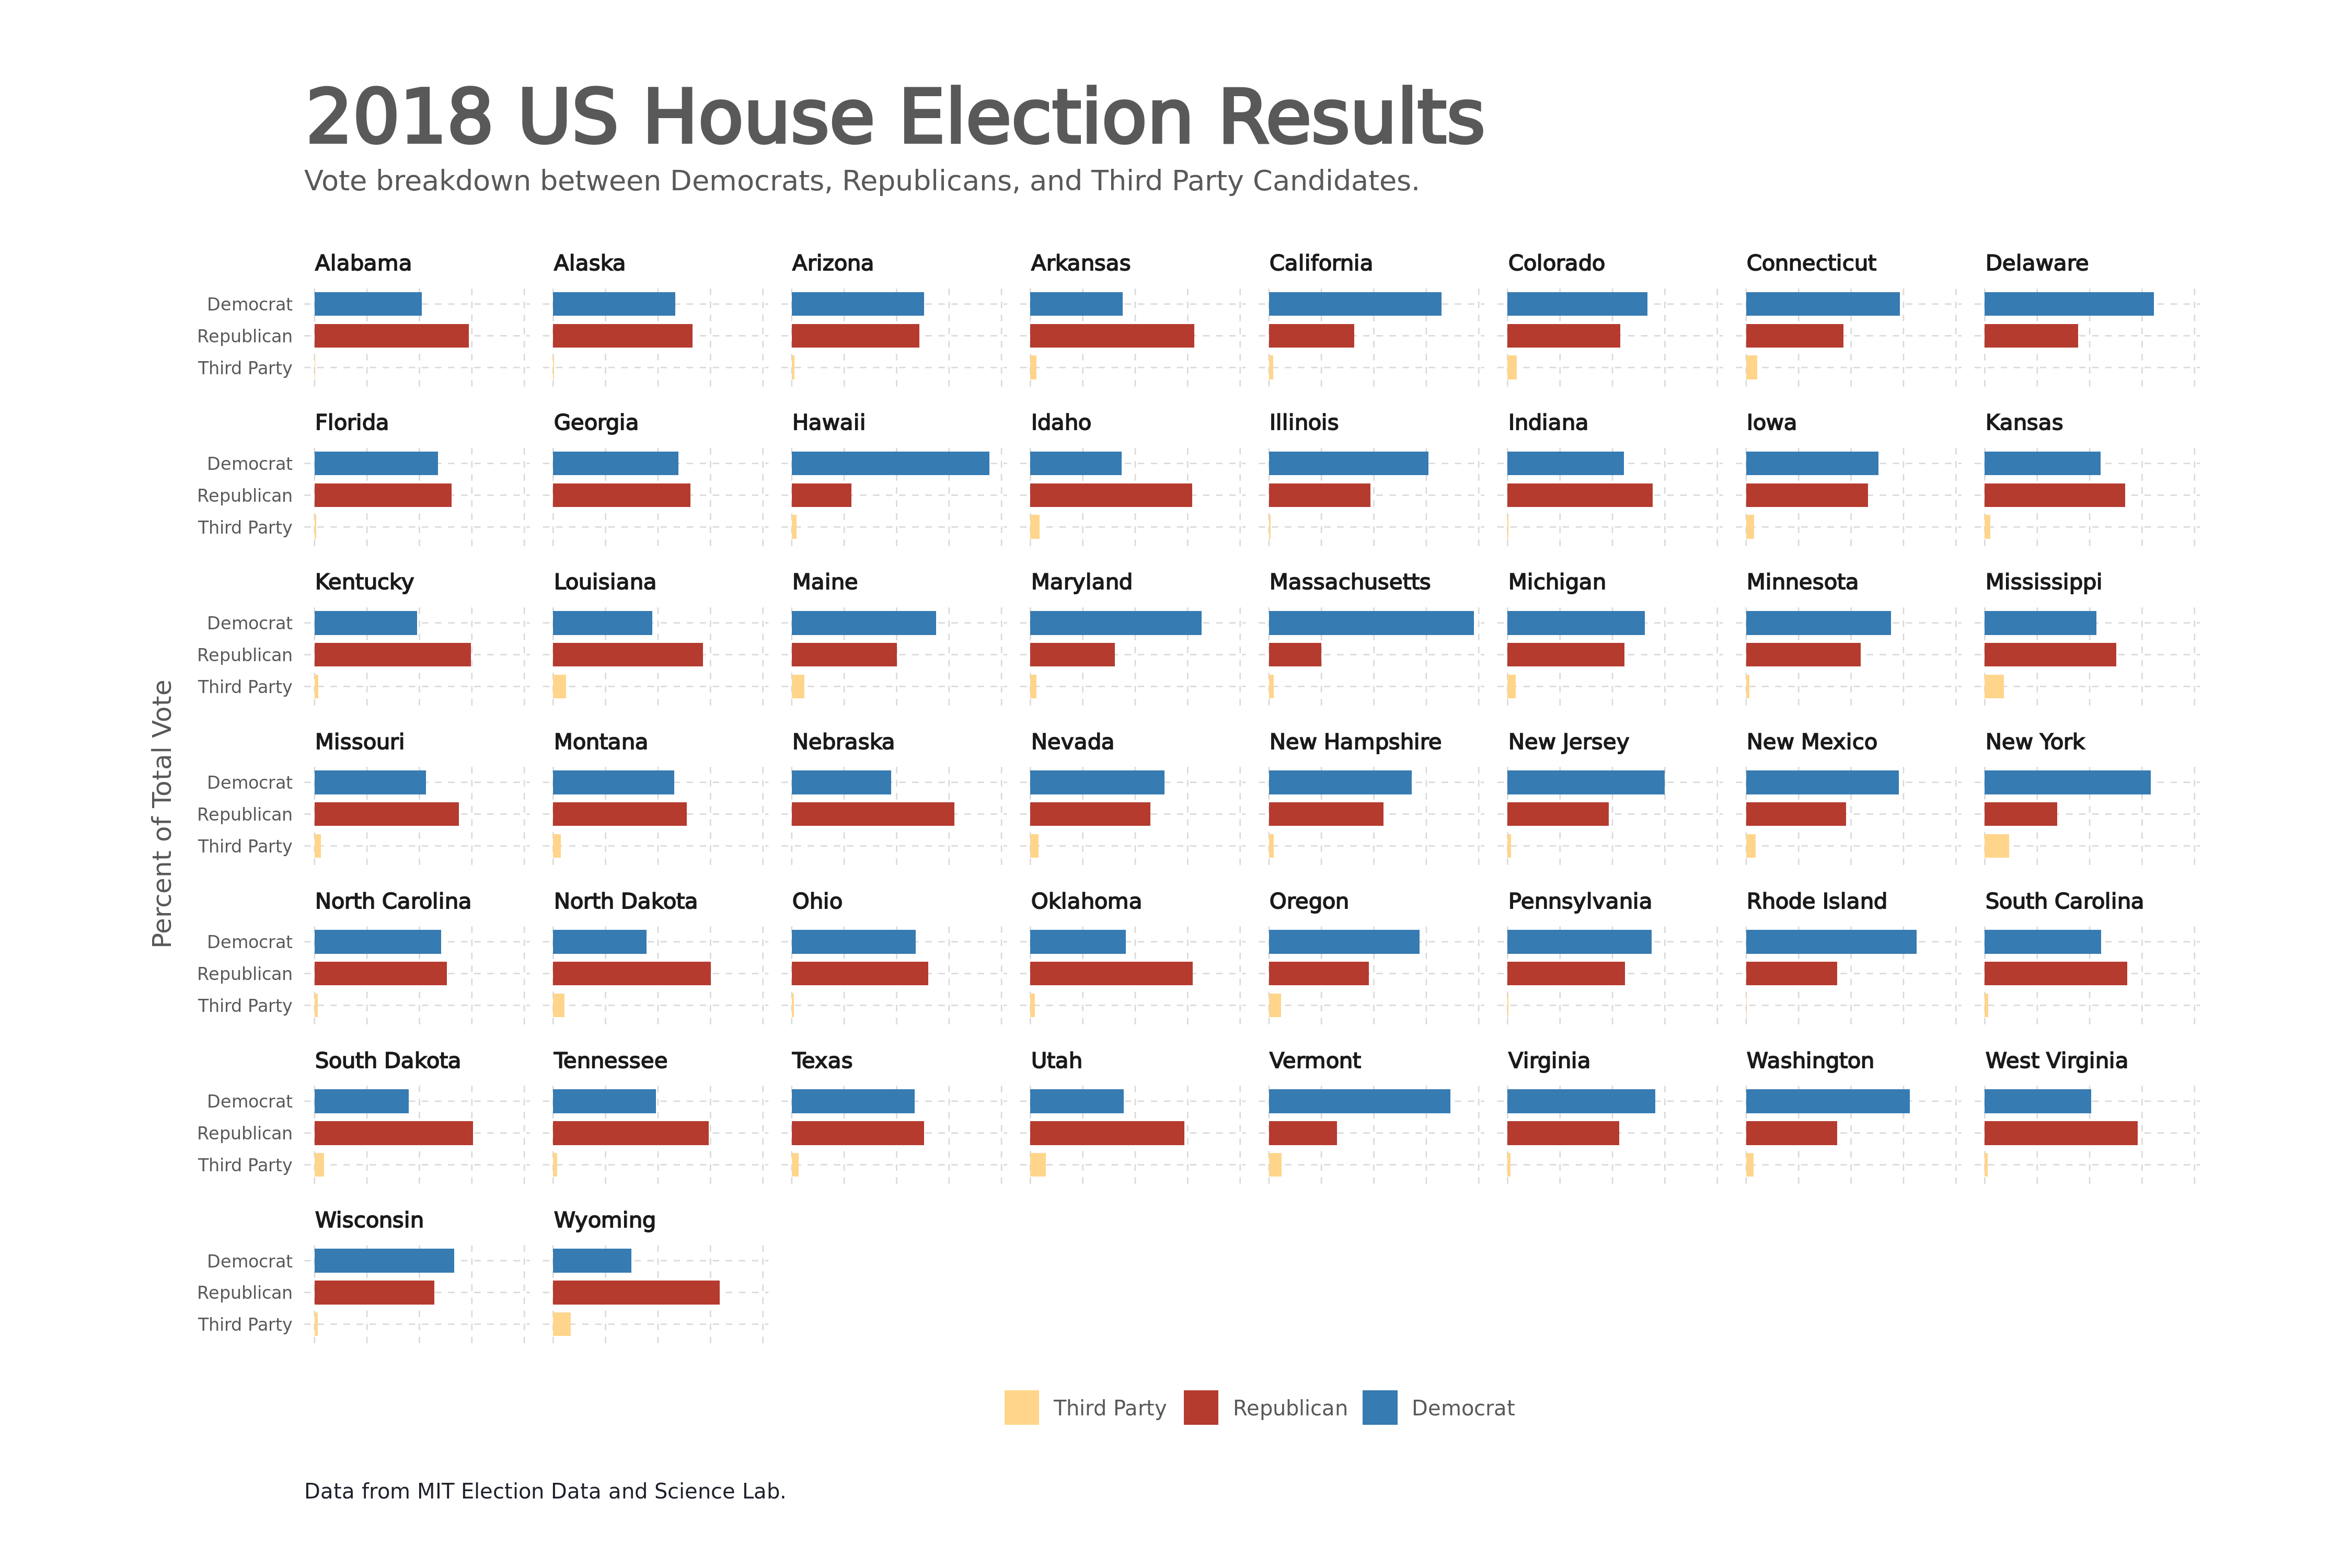

In [56]:
ggplot(houseviz3, aes(party, vote, fill = party)) +
  geom_col(width=0.75) +
  scale_fill_manual(values = c("#ffd58b", "#B53B2F", "#367BB2")) +
  coord_flip() +
  facet_wrap(~state) +
  labs(x = "Percent of Total Vote", title= Title, subtitle = Subtitle, caption = Caption) +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 12, margin = margin(r = 10), family = font_family),
    axis.text.y = element_text(size = 8, colour = font_color, family = font_family),
    axis.text.x = element_blank(),
    strip.text = element_text(face = "bold", hjust = 0, size =10),
    text = element_text(size = 12, lineheight = 0.3, colour = font_color, family = font_family),
    plot.title = element_text(color=font_color, face="bold", family = font_family, size=34, margin=margin(t=10)),
    plot.subtitle = element_text(color= font_color, size=13, lineheight = 0.1, family = font_family, margin=margin(t = 5, b = 20)),
    plot.margin = margin(b = 30, t = 30, r = 70, l = 70),
    plot.caption = element_text(colour = "#1E212B", hjust = 0, family = "lato", margin = margin(t = 20)),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(linewidth = .3, linetype = "dashed", color = "grey85"),
    legend.position = "bottom",
    legend.title = element_blank())